In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 197MB/s]
100% 1.06G/1.06G [00:11<00:00, 100MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [24]:
##generators
## because of large number of images it is difficult to load all the image in the model
## so we use the generators to create batches of the images.
## here we will create two generators one for training data and another for the validation data

In [25]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',##it show 1 for dog and 0 for cat
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
directory='/content/test',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256)

 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
##Normalize
## since all the images are numpy array and it is between 0 to 255 .
## so it need to be converted into the 0 to 1 by normalizing


In [27]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [29]:
## create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.4825 - accuracy: 0.6059 - val_loss: 0.5740 - val_accuracy: 0.6970
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5607 - accuracy: 0.7147 - val_loss: 0.5575 - val_accuracy: 0.7058
Epoch 3/10
625/625 [==============================] - 81s 129ms/step - loss: 0.4836 - accuracy: 0.7675 - val_loss: 0.5984 - val_accuracy: 0.7180
Epoch 4/10
625/625 [==============================] - 83s 133ms/step - loss: 0.4211 - accuracy: 0.8058 - val_loss: 0.4578 - val_accuracy: 0.7932
Epoch 5/10
625/625 [==============================] - 74s 118ms/step - loss: 0.3640 - accuracy: 0.8389 - val_loss: 0.4409 - val_accuracy: 0.8010
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2811 - accuracy: 0.8820 - val_loss: 0.8897 - val_accuracy: 0.7162
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.1998 - accuracy: 0.9184 - val_loss: 0.6222 - val_ac

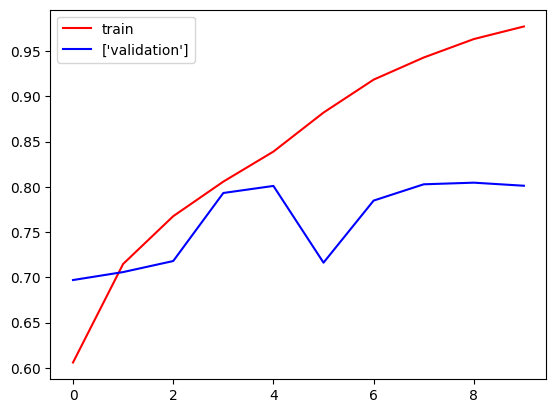

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label=['validation'])
plt.legend()
plt.show()

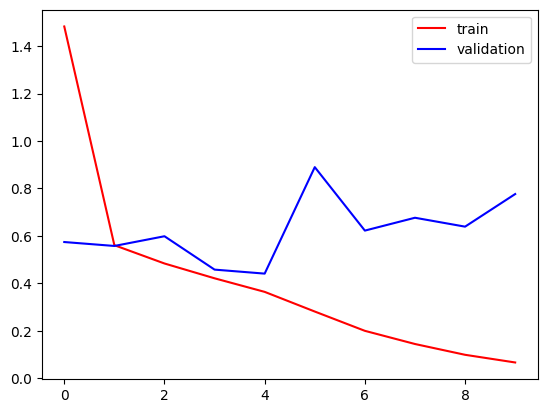

In [35]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [36]:

# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [37]:
import cv2

In [62]:
test_image=cv2.imread('/content/cat2.jpg')

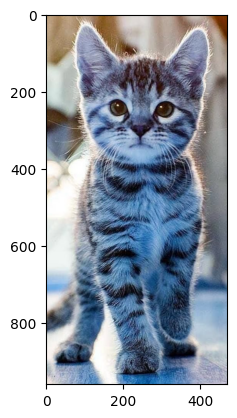

In [63]:
plt.imshow(test_image)

In [64]:
test_image.shape

(960, 470, 3)

In [65]:
test_image=cv2.resize(test_image,(256,256))


In [66]:
test_input=test_image.reshape(1,256,256,3)

In [67]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)